# Practica 40 Limpieza de datos con pandas sobre archivos JSON  
## Responder las preguntas propuestas.  
### Aquellas preguntas que ya están respondidas debe explicar el código.

**El archivo JSON `allcandidatenewssample.json` contiene información sobre noticias y artículos relacionados con varias figuras políticas y eventos de campaña. Cada entrada en el JSON representa un artículo o noticia y contiene los siguientes campos:**

`title`: El título del artículo.  

`url`: La URL del artículo.  

`source`: La fuente del artículo, es decir, el medio de comunicación que lo publicó.  

`time`: La hora o tiempo relativo en que se publicó el artículo.  

`date`: La fecha de publicación del artículo en formato de marca de tiempo (timestamp).  

`query`: El tema o figura política relacionada con el artículo.  

`story_position`: La posición de la historia (en una lista de noticias o resultados).  

`panel_position`: La posición en un panel (en la presentación en una página web).  

`domain`: El dominio de la fuente del artículo.  

`category`: La categoría del artículo.  

**Este archivo almacena metadatos sobre varios artículos de noticias políticos, permitiendo análisis sobre la cobertura mediática, la frecuencia de artículos sobre ciertos temas o figuras políticas, y la distribución de fuentes de noticias.**


In [1]:
import pandas as pd
import numpy as np
import json
import pprint
import matplotlib as plt
from collections import Counter

## Análisis con Python clásico  
**Explicar aquellos códigos cuyas preguntas que ya están resueltas**

### Cargar los datos JSON y buscar posibles problemas  
**Utilice el método `json.load` para devolver datos sobre noticias sobre candidatos políticos. `load` devuelve una lista de diccionarios**

In [17]:
with open('allcandidatenewssample.json') as f:
  candidatenews = json.load(f)

### Utilice `len` para obtener el tamaño de la lista, que en este caso es el número total de noticias. (Cada elemento de la lista es un diccionario con claves para el título, la fuente, etc., y sus respectivos valores).

In [18]:
len(candidatenews)

60000

### Utiliza pprint para mostrar los dos primeros diccionarios:

In [19]:
pprint.pprint(candidatenews[0:2]) 

[{'date': '2019-12-25 10:00:00',
  'domain': 'www.nbcnews.com',
  'panel_position': 1,
  'query': 'Michael Bloomberg',
  'source': 'NBC News',
  'story_position': 6,
  'time': '18 hours ago',
  'title': 'Bloomberg cuts ties with company using prison inmates to make '
           'campaign calls',
  'url': 'https://www.nbcnews.com/politics/2020-election/bloomberg-cuts-ties-company-using-prison-inmates-make-campaign-calls-n1106971'},
 {'date': '2019-11-09 08:00:00',
  'domain': 'www.townandcountrymag.com',
  'panel_position': 1,
  'query': 'Amy Klobuchar',
  'source': 'Town & Country Magazine',
  'story_position': 3,
  'time': '18 hours ago',
  'title': "Democratic Candidates React to Michael Bloomberg's Potential Run",
  'url': 'https://www.townandcountrymag.com/society/politics/a29739854/michael-bloomberg-democratic-candidates-campaign-reactions/'}]


### Obtenga el valor de la clave de origen para el primer elemento de la lista:

In [20]:
pprint.pprint(candidatenews[0]['source'])

'NBC News'


## Comprobar si existen diferencias en la estructura de los diccionarios.  
### Utiliza `counter` para comprobar si hay algún diccionario en la lista con menos, o más, de los 9 pares `clave:valor` normales. Mira algunos de los diccionarios que casi no tienen datos (los que sólo tienen dos claves) antes de eliminarlos. 

In [21]:
Counter([len(item) for item in candidatenews])

Counter({9: 57202, 2: 2382, 10: 416})

In [22]:
pprint.pprint(next(item for item in candidatenews if len(item)<9))

{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'}


In [14]:
pprint.pprint(next(item for item in candidatenews if len(item)>9))

{'category': 'Satire',
 'date': '2019-08-21 04:00:00',
 'domain': 'politics.theonion.com',
 'panel_position': 1,
 'query': 'John Hickenlooper',
 'source': 'Politics | The Onion',
 'story_position': 8,
 'time': '4 days ago',
 'title': '‘And Then There Were 23,’ Says Wayne Messam Crossing Out '
          'Hickenlooper Photo \n'
          'In Elaborate Grid Of Rivals',
 'url': 'https://politics.theonion.com/and-then-there-were-23-says-wayne-messam-crossing-ou-1837311060'}


In [12]:
pprint.pprint([item for item in candidatenews if len(item)==2][0:10])

[{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-07-24 00:00:00', 'reason': 'No Top stories'},
 {'date': '2019-08-19 20:00:00', 'reason': 'Not collected'},
 {'date': '2019-09-13 16:00:00', 'reason': 'Not collected'},
 {'date': '2019-10-16 20:00:00', 'reason': 'No Top stories'},
 {'date': '2019-10-17 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-08-02 14:00:00', 'reason': 'Not collected'},
 {'date': '2019-05-27 12:00:00', 'reason': 'Not collected'},
 {'date': '2019-12-03 12:00:00', 'reason': 'No Top stories'},
 {'date': '2019-01-03 00:00:00', 'reason': 'No Top stories'}]


### Confirme que la lista de diccionarios restante tiene la longitud esperada: 60000-2382=57618:

In [42]:
candidatenews = [item for item in candidatenews if len(item)>2]
len(candidatenews)

57618

## Generar recuentos a partir de los datos JSON.  
### Obtenga los diccionarios sólo para `Político` (un sitio web que cubre noticias políticas) y muestre un par de diccionarios:

In [43]:
politico = [item for item in candidatenews if item.get("source") == "Politico"]
len(politico)

2732

In [29]:
pprint.pprint(politico[0:2])

[{'date': '2019-05-18 18:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Marianne Williamson',
  'source': 'Politico',
  'story_position': 7,
  'time': '1 week ago',
  'title': 'Marianne Williamson reaches donor threshold for Dem debates',
  'url': 'https://www.politico.com/story/2019/05/09/marianne-williamson-2020-election-1315133'},
 {'date': '2018-12-27 06:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Julian Castro',
  'source': 'Politico',
  'story_position': 1,
  'time': '1 hour ago',
  'title': "O'Rourke and Castro on collision course in Texas",
  'url': 'https://www.politico.com/story/2018/12/27/orourke-julian-castro-collision-texas-election-1073720'}]


## Obtenga los datos de `source` y confirme que tienen la longitud prevista.  
### Mostrar los primeros elementos de la nueva lista sources. 

In [46]:
sources = [item.get('source') for item in candidatenews if 'source' in item]
type(sources)

list

In [47]:
len(sources)

57618

In [48]:
sources[0:5]

['NBC News', 'Town & Country Magazine', 'TheHill', 'CNBC.com', 'Fox News']

### Generar un recuento de noticias por fuente y muestra las 10 fuentes más populares. Observe que las noticias de The Hill pueden tener TheHill (sin espacio) o The Hill como valor para la fuente :

In [49]:
pprint.pprint(Counter(sources).most_common(10))

[('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('TheHill', 2383),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('The Hill', 1342),
 ('New York Post', 1275),
 ('Vox', 941)]


## Corrige cualquier error en los valores del diccionario.

### Corrige los valores de la 'source' `The Hill` . Observe que `The Hill` es ahora la fuente fuente más frecuente de noticias:

In [50]:
for newsdict in candidatenews:
    newsdict.update((k, "The Hill") for k, v in newsdict.items()
                    if k == "source" and v == "TheHill")
sources = [item.get('source') for item in candidatenews]
pprint.pprint(Counter(sources).most_common(10))

[('The Hill', 3725),
 ('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('New York Post', 1275),
 ('Vox', 941),
 ('Breitbart', 799)]


# Análisis del archivo json con Pandas

## Crear un dataframe de Pandas  
### 1- Pase los datos JSON al método pandas DataFrame.

### 2- Convierta la columna date a un tipo de datos datetime:

### 3- Cambiar el nombre de la columna `date` por `storydate`:

### 4- Cambiar el dtype de la columna `storydate` por `datetiem64[ns]`

### 5- Nuestre los tipos de datos

### 6- Dimensiones del dataframe (shape)

### 7- Muestra las 10 fuentes (sources) más comunes en el DataFrame `candidatenewsdf` con pandas, junto con el número de veces que cada fuente aparece.

### 8- Mostrar las primeras 5 filas del DataFrame

### 9- Mostrar las ultimas 15 lineas del dataframe

### 10- Filtrar los artículos donde la fuente (source) es "Politico"

### 11- Filtrar los artículos publicados después del 1 de enero de 2020

### 12- Filtrar y mostrar los artículos de "CNN.com"

### 13- Contar los valores nulos en cada columna

### 14- Eliminar filas con valores nulos en la columna "title"

### 15- Rellenar valores nulos en la columna "category" con "Unknown"

### 16- Convertir la columna "panel_position" a tipo float

### 17- Convertir la columna "storydate" a tipo string

### 18- Obtener la media de "story_position"

### 19- Obtener la desviación estándar de "story_position"

### 20- Obtener la cantidad de artículos por fuente (source)

### 21- Obtener el valor mínimo y máximo de "story_position"

### 22- Agrupar por la columna "source" y contar el número de artículos

In [117]:
articles_by_source = candidatenewsdf.groupby('source').size()
print(articles_by_source)

source
                          2
+972 Magazine             1
1010 Wins - Radio.com    25
1011 News                 1
1011Now                   1
                         ..
theGrio                  31
uPolitics                11
vtdigger.org              1
wgbh.org                  2
whotv.com                92
Length: 1723, dtype: int64


### 23- Crear una tabla pivot para analizar la posición de los artículos por fuente

In [118]:
pivot_table = candidatenewsdf.pivot_table(values='story_position', index='source', aggfunc='mean')
print(pivot_table.head())

                       story_position
source                               
                                 4.50
+972 Magazine                    7.00
1010 Wins - Radio.com            7.52
1011 News                        2.00
1011Now                          2.00


### 24- Agrupar por "storydate" y contar el número de artículos por día

In [119]:
articles_by_date = candidatenewsdf.groupby('storydate').size()
print(articles_by_date.head(10))

storydate
2018-12-16 00:00:00    20
2018-12-16 06:00:00    21
2018-12-16 12:00:00    15
2018-12-16 18:00:00    18
2018-12-17 00:00:00    16
2018-12-17 06:00:00    15
2018-12-17 12:00:00    18
2018-12-17 18:00:00    17
2018-12-18 00:00:00    24
2018-12-18 06:00:00    15
dtype: int64


### 25- Graficar el número de artículos por las 10 principales fuentes (explicar código)

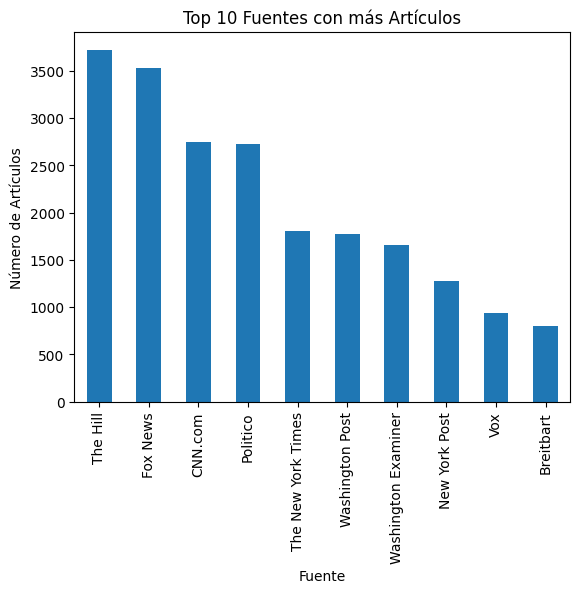

In [121]:
import matplotlib.pyplot as plt
top_sources = candidatenewsdf['source'].value_counts().head(10)
top_sources.plot(kind='bar')
plt.title('Top 10 Fuentes con más Artículos')
plt.xlabel('Fuente')
plt.ylabel('Número de Artículos')
plt.show()

### 26- Graficar la distribución de "story_position"

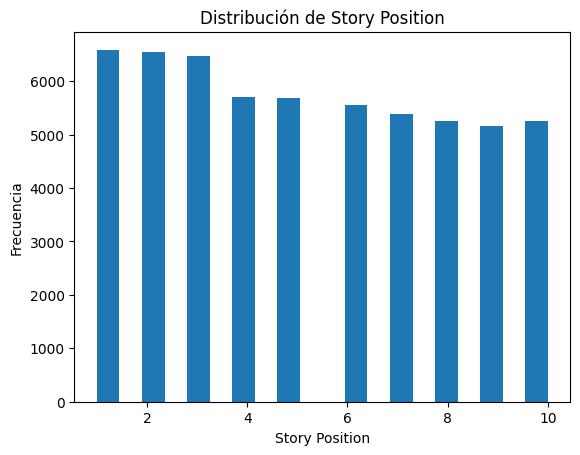

In [122]:
candidatenewsdf['story_position'].plot(kind='hist', bins=20)
plt.title('Distribución de Story Position')
plt.xlabel('Story Position')
plt.ylabel('Frecuencia')
plt.show()

### 27- Convertir la columna "storydate" a formato datetime

### 28- Crear una nueva columna con el año de "storydate"

### 29- Crear una nueva columna con el mes de "storydate"

### 30- Convertir el DataFrame filtrado de "CNN.com" a formato JSON

### 31- Exportar el DataFrame filtrado de "CNN.com" a un archivo CSV

### 32- Mostrar los artículos con la mayor "story_position" por fuente

### 33- Calcular el resumen estadístico de la columna "story_position"

### 34- Calcular el conteo de valores únicos en la columna "query"

### 35- Calcular o contar los valores faltantes de cada columna

### 36- Filtrar filas donde falta algún dato

### 37- Borrar la columna `category` del dataframe y guardarlo en otro dataframe

### 38- Filtrar filas donde la columna 'source' está vacía o es nula

### 39-  Eliminar filas donde la columna 'source' está vacía o es nula

### 40- Calcular la media de la columna story_position para cada query